## Objetivos

  - Apresentar o conceito de Regressão
  - Apresentar e utilizar algoritmo de Regressão linear
  - Apresentar e utilizar Regressão Polinomial
  - Apresentar e discutir a matriz de correlação
  - Apresentar uma intuição sobre métricas de avaliação (MSE, RMSE e $ R² $ )


  

## Começando

Sabemos que dentro de aprendizado supervisionado vamos trabalhar com dois tipos de problemas:

- [x]  Classificação - (Já conhecemos o KNN)
- [ ]  Regressão - (Objetivo de hoje)

### Uma intuição sobre problemas que envolvem cada um deles:

        Classificação --> Resultados discretos (categóricos).
        Regressão --> Resultados numéricos e contínuos.


### Regressão linear

É uma técnica que consiste em representar um conjunto de dados por meio de uma reta.


    Na matemática aprendemos que a equação de uma reta é:

$$
Y = A + BX \\
$$
A e B são constantes que determinam a posição e inclinação da reta. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão linear é:

$$
Y_{predito} = \beta_o + \beta_1X \\
$$

$ \beta_o $ e $ \beta_1 $ são parâmetros que determinam o peso e bias da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.

![reta](/aulas/lab03/reta.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/reta.png?raw=1">

Essa ideia se estende para mais de um parâmetro independente, mas nesse caso não estamos associando a uma reta e sim a um plano ou hiperplano:

$$
Y_{predito} = \beta_o + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n\\
$$

![plano](/aulas/lab03/plano.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/plano.png?raw=1" width="450">

Em outras palavras, modelos de regressão linear são intuitivos, fáceis de interpretar e se ajustam aos dados razoavelmente bem em muitos problemas.


## Bora lá!!

Vamos desenvolver um projeto completo de regressão, desde a exploração inicial dos dados até a construção e avaliação do modelo final.



## Definição do problema

Vamos explorar um dataset que contém informações detalhadas sobre 1303 modelos de notebooks. Este dataset foi compilado para nos ajudar a entender as características técnicas e de mercado.

Informações importantes sobre o significado de cada um dos atributos

- O dataset "laptop_data.csv" contém 1303 entradas e 12 colunas. 

- As colunas incluem:

    - Unnamed: 0: Um índice ou identificador numérico para cada entrada.
    - Company: A marca ou fabricante do laptop.
    - TypeName: O tipo ou categoria do laptop (por exemplo, Notebook, Ultrabook, etc.).
    - Inches: O tamanho da tela do laptop em polegadas.
    - ScreenResolution: A resolução da tela do laptop.
    - Cpu: O modelo e a especificação da CPU do laptop.
    - Ram: A quantidade de RAM no laptop.
    - Memory: O tipo e a capacidade de armazenamento (por exemplo, HDD, SSD).
    - Gpu: A unidade de processamento gráfico (GPU) do laptop.
    - OpSys: O sistema operacional instalado no laptop.
    - Weight: O peso do laptop.
    - Price: O preço do laptop.

## Objetivo 

`Queremos desenvolver um modelo capaz de predizer o valor de um notebook.`


### Desafio 1

Do ponto de vista de machine learning, que problema é esse:

    Aprendizado supervisionado, não-supervisionado ou aprendizado por reforço?

R:

    Classificação, regressão ou clusterização?

R:


In [62]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
df = pd.read_csv('laptop_data.csv')

In [65]:
# Verifique se o dataset foi carregado corretamente, 
# imprimindo o nome das colunas do dataset e as primeiras linhas do dataset 
# use o comando head() para visualizar as primeiras linhas do dataset

df.head()






,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [66]:
# verificando se existem valores duplicados 

df.duplicated().sum()

# dropando as linhas duplicadas

df.drop_duplicates(inplace=True)

In [67]:
# drop a coluna Unnamed: 0 do dataset e imprima novamente as primeiras linhas do dataset

df.drop(columns=['Unnamed: 0'],inplace=True)

### Desafio 2

Use os metodos info() e describe() para exibir as informações do dataframe e responda:

Existe dados faltantes?

Qual o tipo de dados dos atributos, isso faz sentido?


In [68]:
# use o comando info() para visualizar as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [69]:
# use o comando describe() para visualizar as estatísticas do dataset
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


Dentre outras análises, é esperado que você tenha reparado que os atributos `Ram` e `Weight` estão como object. Como sugestão, podemos converter esses atributos para dado numérico.

In [70]:
# usamos o comando str.replace() para remover a unidade de medida dos valores
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# usamos o comando astype() para converter os valores para o tipo numérico
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')


In [71]:
# use o comando info() para visualizar as informações do dataset após a conversão
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [72]:
# use o comando describe() para visualizar as estatísticas do dataset após a conversão 
df.describe()




,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


### Explorando os Dados Visualmente


Agora, vamos mergulhar nos dados para descobrir padrões, tendências e insights que só podem ser revelados por uma análise visual. Elabore análises para tentar responder algumas das seguintes perguntas:

- Como o tamanho da tela influencia o preço?
- Qual a marca de notebook que mais vende?
- A marca que mais vende é a que possui os maiores preços?
- Existe uma correlação entre a marca do laptop e o tipo de GPU utilizado?
- Quais são as faixas de preços mais comuns? Certos tipos de laptops dominam o mercado?
- Será que a distribuição de preços varia muito entre diferentes marcas? E entre diferentes tipos de memória?
- Existem laptops com preços ou especificações muito fora do comum?

Aplique os métodos que achar conveniente (já vimos algumas opções em aula) para visualizar os dados de forma gráfica. Use esses gráficos para identificar padrões e relações que podem ser explorados em análises mais profundas.


In [8]:
## Sua resposta e seus gráficos para análisar..







In [ ]:
## Sua resposta e seus gráficos para análisar..

In [ ]:
## Sua resposta e seus gráficos para análisar..

In [ ]:
## Sua resposta e seus gráficos para análisar..

In [ ]:
## Sua resposta e seus gráficos para análisar..

## Pré-processamento de dados

Vamos imaginar que estamos interessados em saber se a presença de uma tela touchscreen influencia o preço de um laptop. 

- `Como você extrairia informação dos dados que temos em formato de texto e a transformaria em algo que possa ser visualizado ou modelado?`



In [73]:
# vamos explorar o atributo ScreenResolution
# use o comando value_counts() para visualizar a frequência dos valores do atributo ScreenResolution

df['ScreenResolution'].value_counts()



ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

Vamos aplicar uma transformação em nossos dados: 

- Vamos realizar uma transformação em nossos dados usando o atributo ScreenResolution. 
- Vamos analisar os valores presentes nessa coluna e verificar se eles contêm a informação sobre a presença de uma tela touchscreen. 
- A partir dessa verificação, criaremos uma nova coluna `Touchscreen` que indicará, de forma binária, se o laptop possui ou não uma tela touchscreen (1 para sim e 0 para não).

In [74]:
# Vamos criar uma nova coluna chamada 'Touchscreen' que recebe 1 se o valor da coluna 'ScreenResolution' contém a palavra 'Touchscreen' e 0 caso contrário
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


<Axes: xlabel='Touchscreen'>

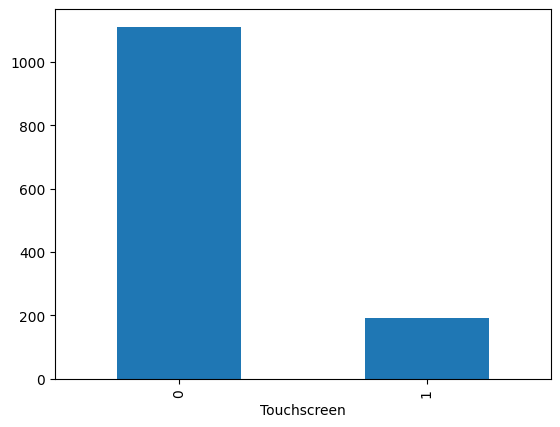

In [75]:
# podemos visualizar graficamente a quantidade de laptops com e sem touchscreen
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

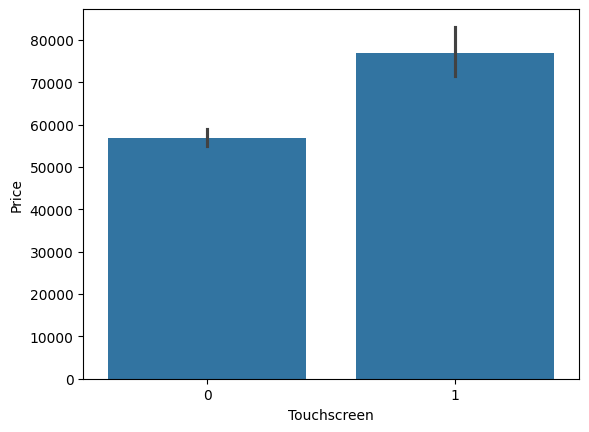

In [76]:
# avaliando o preço com e sem touchscreen
sns.barplot(x=df['Touchscreen'],y=df['Price'])

## Desafio 3 

Implemente as seguintes transformações nos dados:

- criar uma nova coluna chamada 'Ips' que recebe 1 se o valor da coluna 'ScreenResolution' contém a palavra 'IPS' e 0 caso contrário.



In [ ]:
## Sua resposta aqui

## Desafio 4

- criar uma nova coluna chamada 'Cpu Name' que recebe da coluna 'Cpu' o nome do fabricante da cpu, Intel, AMD e outros...


In [ ]:
## Sua resposta aqui

## Desafio 5

- criar uma nova coluna chamada 'Cpu Name' que recebe da coluna 'Cpu' o nome do fabricante da cpu, Intel, AMD e outros...


In [ ]:
## Sua resposta aqui

## Desafio 6

- criar uma nova coluna chamada 'Gpu Name' que recebe da coluna 'Gpu' o nome do fabricante da cpu, Nvidia, Intel e AMD.


In [ ]:
## Sua resposta aqui

## Desafio resolvido

- criar uma nova coluna chamada 'os' que recebe da coluna 'OpSys' o nome do fabricante do sistema operacional: Windows, MAC, Linux.

In [77]:
# Vamos explorar o atributo 'OpSys'
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

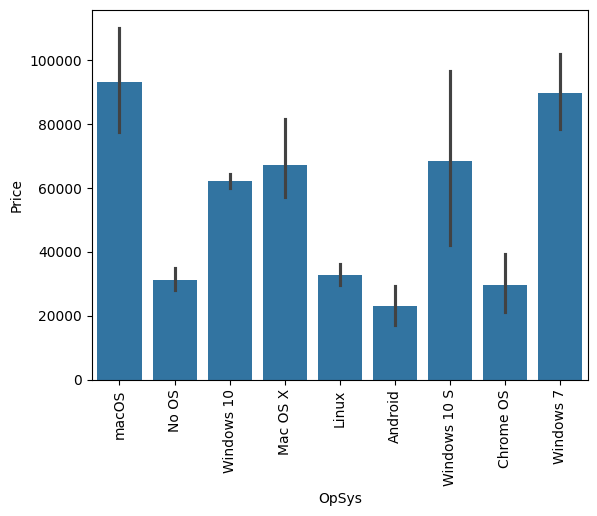

In [78]:
# podemos visualizar graficamente a quantidade de laptops com cada sistema operacional
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [79]:
# vamos criar uma nova coluna chamada 'OS' que recebe o valor 'Windows' se o valor da coluna 'OpSys' for 'Windows 10', 'Windows 7' ou 'Windows 10 S', 'Mac' se o valor for 'macOS' ou 'Mac OS X' e 'Others/No OS/Linux' caso contrário

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

df['OS'] = df['OpSys'].apply(cat_os)

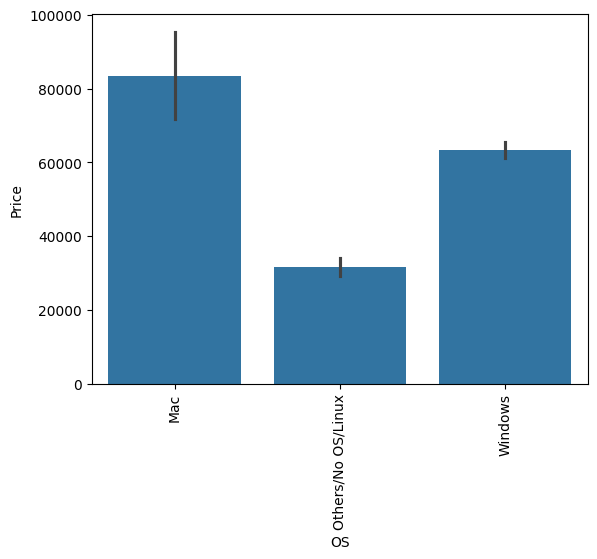

In [80]:
# podemos visualizar graficamente a quantidade de laptops com cada sistema operacional
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [81]:
# Vamos explorar o atributo 'OS'
df['OS'].value_counts()

OS
Windows               1125
Others/No OS/Linux     157
Mac                     21
Name: count, dtype: int64

In [82]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,OS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,Mac
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,Others/No OS/Linux
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,Mac


## Desafio 7

- Análise o atributo `Memory`, visualize os tipos de memoria existentes: É espeperado que você consiga observar 4 tipos de memoria, são elas: 
    - HDD	
    - SSD	
    - Hybrid	
    - Flash_Storage

- Faça a conversão de unidade: Note que a capacidade de armazenamento variam bastante e devem ser padronizadas em GB, os valores em TB devem ser convertidos para GB, ou seja 1TB = 1000GB.
- Crie novas colunas chamadas 'SSD', 'HDD', 'Hybrid' e 'Flash_Storage' que recebe da coluna 'Memory' o valor da capacidade de memoria.
- Note que em alguns casos uma entrada de dados possui mais de um tipo de memoria '512GB SSD +  2TB HDD' e nesse caso deve ser alocado o valor correto nas duas colunas.


In [27]:
## Sua resposta aqui




### Avaliação de correlação

Vamos explorar a correlação entre os atributos numéricos

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  OS                1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(1), object(8)
memory usage: 122.3+ KB


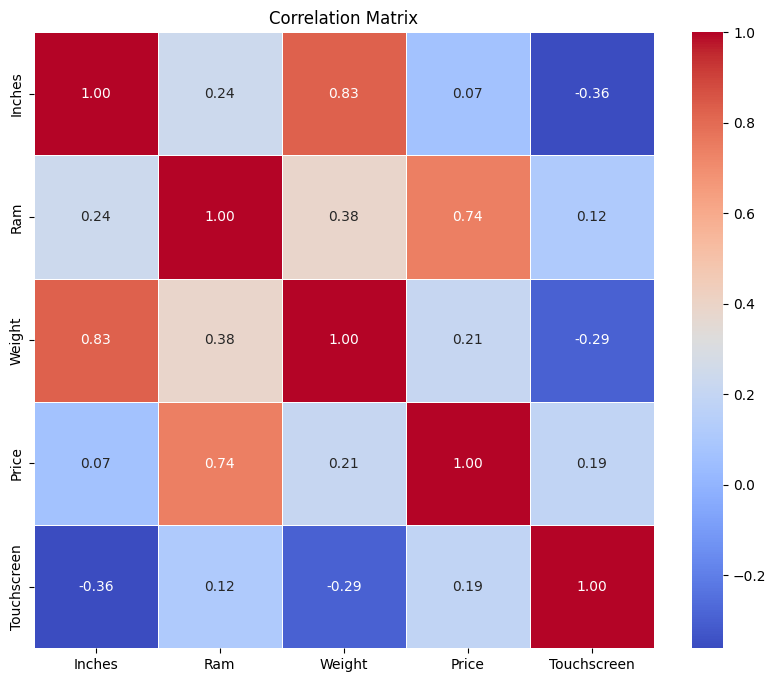

In [88]:
# exibe a correlação entre as variáveis numéricas

# Calcula a matriz de correlação
correlation_matrix = df[['Inches', 'Ram', 'Weight', 'Price','Touchscreen']].corr()

# exibe a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



### Desafio 8

Analisando a matriz de correlação acima responda:

Qual(is) feature possue a maior correlação com o target?

Qual(is) feature não possue correlação com o target?


## PARE!!!

Podemos pensar em outras diversas transformações em nossos dados, por hora já está bom. Vamos avançar e criar um sub-dataset com os atributos que serão utilizados para treinar nosso modelo de Machine Learning.


## Desafio 9

- Identificação do Atributo Alvo: Qual é o atributo que queremos prever ou analisar como nossa variável de interesse principal neste conjunto de dados?



In [94]:
# Vamos treinar nosso modelo com base no dataset de laptops e prever o preço de um laptop com as seguintes características:


X = df[['Inches', 'Ram', 'Weight','Touchscreen']]
# X = df.drop(['Price'], axis=1)     ### teste com todas as entradas

Y = df['Price']             

print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (1303, 4) e saidas (1303,)


## Dividindo os dados em conjunto de treinamento e de testes

Dividir nosso dataset em dois conjuntos de dados.
    
    Treinamento - Representa 80% das amostras do conjunto de dados original,
    Teste - com 20% das amostras

Vamos escolher aleatoriamente algumas amostras do conjunto original. Isto pode ser feito com Scikit-Learn usando a função ***train_test_split()***


***scikit-learn*** Caso ainda não tenha instalado, no terminal digite:
- pip install scikit-learn



In [95]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(1042, 4)
(261, 4)
(1042,)
(261,)


In [96]:
#Primeiras linhas do dataframe 
X_treino.head()

,Inches,Ram,Weight,Touchscreen
119,15.6,8,1.70,0
438,14.0,24,1.32,0
24,15.6,8,1.91,0
1010,15.6,8,2.65,0
631,15.6,16,2.62,0


In [97]:
Y_treino.head()

119      59567.04
438     126912.96
24       35111.52
1010     50562.72
631      78801.12
Name: Price, dtype: float64

## Chegou a hora de aplicar o modelo preditivo

Treinar um modelo no python é simples se usar o Scikit-Learn. 
Treinar um modelo no Scikit-Learn é simples: basta criar o regressor, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método `fit(X,Y)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método `predict(X)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes



In [98]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão 
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)




LinearRegression()

Pronto!! bora testar se esta funcionando....


In [99]:
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))


Predição usando regressão, retorna valores continuos: [100034.37969786  59932.48674075  28480.27437865  59685.46857027
  54085.85527543  99275.47252861  43184.31534678  32354.91705733
  36263.18833347  63602.67213891  64228.45109843  62957.03363296
  58323.48378503 107077.6245361   50573.50573024  60228.9082705
  99470.31655009  54448.14840892  32667.80663524  32519.59596852
  54481.08411263  54514.01981635  54711.63443126  32338.44920547
  54184.66258289  68103.09397342  57697.70482551  54596.35907564
  31959.68841644  99458.0040976   60320.1800186   58685.77691852
  54777.50583869  32848.9533983   21374.17318158  31959.68841644
  50655.84498953  65771.58264672  54942.18435727  36526.6741595
  28480.27437865  59932.48674075  50738.18424882  58027.06205897
  99622.6830088   31959.68841644  37634.10560752  59932.48674075
  54184.66258289  32354.91705733  54415.2127052   53405.97899809
  32848.9533983   32190.23853875  36427.86704835 183667.48320055
  37699.97701495  32354.91705733 10985

## Avaliando o modelo treinado

Vamos colocar alguns valores e ver a predição do classificador. 

In [100]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 177032003697 
Erro Quadrático Médio (MSE): 678283539.07
Erro Médio Absoluto (MAE): 19312.26
Raiz do Erro Quadrático Médio (RMSE): 26043.88 
R2-score: 0.02


### Desafio 10

Refaça o notebook substituindo o algoritmo de regressão linear por outro algoritmo de regressão e compare os resultados obtidos.

Sugestão de alguns algoritmos de ML para problemas de regressão:

| Nome | Vantagem | Desvantagem | Exemplo sklearn |
|:---:|:---:|:---:|:---:|
| Regressão Linear | Fácil de entender e implementar | Pode não ser adequado para problemas mais complexos | from sklearn.linear_model import LinearRegression<br><br><br>model = LinearRegression()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Árvores de decisão | Fácil de entender e visualizar | Pode levar a overfitting se a árvore for muito grande | from sklearn.tree import DecisionTreeRegressor<br><br><br>model = DecisionTreeRegressor()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Random Forest | Mais robusto e geralmente mais preciso do que uma única árvore de decisão | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import RandomForestRegressor<br><br><br>model = RandomForestRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Support Vector Regression (SVR) | Lida bem com dados multidimensionais e não lineares | Pode ser difícil de escolher o kernel correto e ajustar os hiperparâmetros | from sklearn.svm import SVR<br><br><br>model = SVR(kernel='rbf')<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Gradient Boosting | Preciso e lida bem com dados multidimensionais e não lineares | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import GradientBoostingRegressor<br><br><br>model = GradientBoostingRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
|  |  |  |  |




In [21]:
## implemente sua sua solução....




## Exportando o Modelo

Agora que concluímos o treinamento do nosso modelo, é hora de salvá-lo para que possamos reutilizá-lo posteriormente. Isso nos permitirá aplicar o modelo a novos dados sem precisar treiná-lo novamente, economizando tempo e recursos.

In [101]:
import joblib

# Supondo que seu modelo treinado seja armazenado na variável `model`
joblib.dump(lin_model, 'modelo_treinado.joblib')


['modelo_treinado.joblib']

In [102]:
# Para carregar o modelo posteriormente

model = joblib.load('modelo_treinado.joblib')


## Regressão Polinomial

$$
Y = A + BX + C X² \\
$$
A, B e C são constantes que determinam a posição e inclinação da curva, o 2 indica o grau do polinômio. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão Polinomial é:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² \\
$$

$ \beta_o $ , $ \beta_1 $ e $ \beta_2 $ são parâmetros que determinam o peso da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.


Essa ideia se estende para polinômio de graus maiores:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² + ... + \beta_nX^n\\
$$



Soma dos Erros ao Quadrado (SSE): 602124 
Erro Quadrático Médio (MSE): 20070.81
Erro Médio Absoluto (MAE): 104.66
Raiz do Erro Quadrático Médio (RMSE): 141.67 
R2-score: 0.55


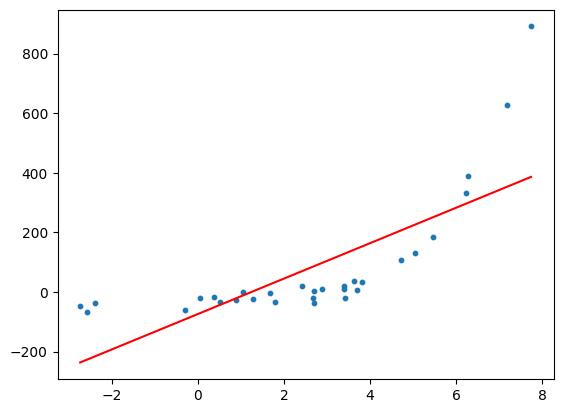

In [103]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#####----------- vou gerar alguns numeros aleatórios ------------------

#gerando numeros aleatorios, apenas para este exemplo
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3)+ 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)

# ajuste nos dados, pois estamos trabalhando com a numpy 
x = x[:, np.newaxis]
y = y[:, np.newaxis]
####---------------pronto já temos os dados para treinar -------------


#----É aqui que o seu código muda ------------------------------------

# Chama a função definindo o grau do polinomio e aplica o modelo

grau_poly = 1
polynomial_features= PolynomialFeatures(degree = grau_poly)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='r')
plt.show()

### Desafio 11

Faça uma função que calcula a regressão polinomial (basicamente colocar o codigo acima em uma função), agora faça um código que chama essa função alterando o grau do polinomio de 2 até 10, basicamente um loop for que chama a função criada. 

Análise os resultados obtidos e determine qual o melhor grau polinomio do seu modelo. 

In [23]:
## Implemente sua solução




